In [21]:
debug = False
import requests
#To disable using Python code (requests < 2.16.0):
#from requests.packages.urllib3.exceptions import InsecureRequestWarning
#requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

#To disable using Python code (requests >= 2.16.0)
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
from bs4 import BeautifulSoup

import collections
teams=[]
Team = collections.namedtuple("Team", ['Position', 'Club', 'Pts', 'J', 'G', 'N', 'P', 'Bp', 'Bc', 'Diff'], rename=False)


In [22]:
url = "https://www.lfp.fr/ligue1/classement?cat=Gen"
j=input('Quelle journee ? (0 pour derniere journee) : ')
if j:url = "https://www.lfp.fr/ligue1/classement?journee1=0&journee2="+str(j)+"&cat=Gen"

result = requests.get(url, verify=False)
src = result.content
soup = BeautifulSoup(src, 'lxml')
div = soup.find_all('div')
if debug : print('div',div)
urls = []

id_tag = soup.find(id='classement_l1')
thead_tag = id_tag.find_all('thead')
tr_tag = id_tag.find_all('tr')
j_tag = soup.find(id='journee2')

Quelle journee ? (0 pour derniere journee) : 0


In [23]:
def hasSelected(tag):
    if tag.name != 'option':
        return False
    try:
        if tag['selected']: return True
    except:
        return False
    
def ratio(t,p):
    return int((int(p)/int(t.J))*100)/100

def statistics():
    print('%-25s%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s' % ('Club','Pts','J','G','N','P','Bp','Bc','Diff','Pts/J','Bp/J','Bc/J'))
    for t in teams:
        print('%-25s%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s' % (t.Club,t.Pts,t.J,t.G,t.N,t.P,t.Bp,t.Bc,t.Diff,round((3*int(t.G)+int(t.N))/int(t.J),2),round(int(t.Bp)/int(t.J),2),round(int(t.Bc)/int(t.J),2)))

In [24]:
#search texte journee j
select_tag = soup.find_all('select')
#if debug : print('select_tag',select_tag[0].contents)
for child in select_tag[0].children:
    if hasSelected(child):
        saison=child.text
        break

for child in select_tag[2].children:
    if hasSelected(child):
        journee=child.text
        break

print('Classement',saison,journee)

Classement 2019/2020 19ème journée


In [25]:
#make header
data=[]
for t in thead_tag:
    d=()
    child=t.findChildren('th')
    for c in child:
        d+=(c.text,)
        if debug : print(c.text,end='\t')
data.append(d)
if debug : print()
if debug : print('data_head',data,'end')

In [26]:
pos=0
debug = True
for a in tr_tag[1:]:
    pos+=1
    d=()
    child=a.findChildren('td')
    for c in child:
        if (c.string is None):
            d+=(c.findChild().text.strip(),)
            #if debug : print(c.findChild().text.strip(),end='\t')
        else:
            d+=(c.text,)
            #if debug : print(c.string,end='\t')
    if debug : print(*d)

    data.append(d)
    teams.append(Team(*d))

1 Paris Saint-Germain 45 18 15 0 3 43 10 +33
2 Olympique de Marseille 38 19 11 5 3 29 21 +8
3 Stade Rennais FC 33 18 10 3 5 24 17 +7
4 LOSC 31 19 9 4 6 24 21 +3
5 FC Nantes 29 19 9 2 8 17 18 -1
6 Stade de Reims 28 18 7 7 4 16 10 +6
7 AS Monaco 28 18 8 4 6 31 26 +5
8 Angers SCO 28 19 8 4 7 22 24 -2
9 Montpellier Hérault SC 27 19 7 6 6 26 19 +7
10 OGC Nice 27 19 8 3 8 28 27 +1
11 RC Strasbourg Alsace 27 19 8 3 8 23 24 -1
12 Olympique Lyonnais 26 19 7 5 7 29 18 +11
13 Girondins de Bordeaux 26 19 7 5 7 28 22 +6
14 AS Saint-Etienne 25 19 7 4 8 22 29 -7
15 Stade Brestois 29 22 19 5 7 7 21 24 -3
16 Dijon FCO 18 19 4 6 9 14 22 -8
17 FC Metz 17 19 3 8 8 17 28 -11
18 Amiens SC 17 18 4 5 9 21 36 -15
19 Nîmes Olympique 12 18 2 6 10 13 32 -19
20 Toulouse FC 12 19 3 3 13 19 39 -20


In [27]:
statistics()    

Club                     Pts	J	G	N	P	Bp	Bc	Diff	Pts/J	Bp/J	Bc/J
Paris Saint-Germain      45	18	15	0	3	43	10	+33	2.5	2.39	0.56
Olympique de Marseille   38	19	11	5	3	29	21	+8	2.0	1.53	1.11
Stade Rennais FC         33	18	10	3	5	24	17	+7	1.83	1.33	0.94
LOSC                     31	19	9	4	6	24	21	+3	1.63	1.26	1.11
FC Nantes                29	19	9	2	8	17	18	-1	1.53	0.89	0.95
Stade de Reims           28	18	7	7	4	16	10	+6	1.56	0.89	0.56
AS Monaco                28	18	8	4	6	31	26	+5	1.56	1.72	1.44
Angers SCO               28	19	8	4	7	22	24	-2	1.47	1.16	1.26
Montpellier Hérault SC   27	19	7	6	6	26	19	+7	1.42	1.37	1.0
OGC Nice                 27	19	8	3	8	28	27	+1	1.42	1.47	1.42
RC Strasbourg Alsace     27	19	8	3	8	23	24	-1	1.42	1.21	1.26
Olympique Lyonnais       26	19	7	5	7	29	18	+11	1.37	1.53	0.95
Girondins de Bordeaux    26	19	7	5	7	28	22	+6	1.37	1.47	1.16
AS Saint-Etienne         25	19	7	4	8	22	29	-7	1.32	1.16	1.53
Stade Brestois 29        22	19	5	7	7	21	24	-3	1.16	1.11	1.26
Dijon FCO          

In [28]:
#print(data,len(data))
import pandas as pd
df = pd.DataFrame(data)
df.to_csv('data.txt', sep = ',')
#df.iloc[1,2]
df

,0,1,2,3,4,5,6,7,8,9
0,Position,Club,Pts,J,G,N,P,Bp,Bc,Diff.
1,1,Paris Saint-Germain,45,18,15,0,3,43,10,+33
2,2,Olympique de Marseille,38,19,11,5,3,29,21,+8
3,3,Stade Rennais FC,33,18,10,3,5,24,17,+7
4,4,LOSC,31,19,9,4,6,24,21,+3
5,5,FC Nantes,29,19,9,2,8,17,18,-1
6,6,Stade de Reims,28,18,7,7,4,16,10,+6
7,7,AS Monaco,28,18,8,4,6,31,26,+5
8,8,Angers SCO,28,19,8,4,7,22,24,-2
9,9,Montpellier Hérault SC,27,19,7,6,6,26,19,+7


In [29]:
df.columns=df.iloc[0,:] #rename columns labels with row 0
df.to_csv('data2.txt', sep = ',')
df

,Position,Club,Pts,J,G,N,P,Bp,Bc,Diff.
0,Position,Club,Pts,J,G,N,P,Bp,Bc,Diff.
1,1,Paris Saint-Germain,45,18,15,0,3,43,10,+33
2,2,Olympique de Marseille,38,19,11,5,3,29,21,+8
3,3,Stade Rennais FC,33,18,10,3,5,24,17,+7
4,4,LOSC,31,19,9,4,6,24,21,+3
5,5,FC Nantes,29,19,9,2,8,17,18,-1
6,6,Stade de Reims,28,18,7,7,4,16,10,+6
7,7,AS Monaco,28,18,8,4,6,31,26,+5
8,8,Angers SCO,28,19,8,4,7,22,24,-2
9,9,Montpellier Hérault SC,27,19,7,6,6,26,19,+7


In [30]:
df.drop(0, axis=0, inplace=True) #drop row 0
df.to_csv('data3.txt', sep = ',')
df

,Position,Club,Pts,J,G,N,P,Bp,Bc,Diff.
1,1,Paris Saint-Germain,45,18,15,0,3,43,10,+33
2,2,Olympique de Marseille,38,19,11,5,3,29,21,+8
3,3,Stade Rennais FC,33,18,10,3,5,24,17,+7
4,4,LOSC,31,19,9,4,6,24,21,+3
5,5,FC Nantes,29,19,9,2,8,17,18,-1
6,6,Stade de Reims,28,18,7,7,4,16,10,+6
7,7,AS Monaco,28,18,8,4,6,31,26,+5
8,8,Angers SCO,28,19,8,4,7,22,24,-2
9,9,Montpellier Hérault SC,27,19,7,6,6,26,19,+7
10,10,OGC Nice,27,19,8,3,8,28,27,+1


In [32]:
#df.reindex()
#df

In [33]:
df.set_index('Position', drop=True, inplace=True)
df.to_csv('data4.txt', sep = ',')  #csv correct
df

,Club,Pts,J,G,N,P,Bp,Bc,Diff.
Position,,,,,,,,,
1,Paris Saint-Germain,45,18,15,0,3,43,10,+33
2,Olympique de Marseille,38,19,11,5,3,29,21,+8
3,Stade Rennais FC,33,18,10,3,5,24,17,+7
4,LOSC,31,19,9,4,6,24,21,+3
5,FC Nantes,29,19,9,2,8,17,18,-1
6,Stade de Reims,28,18,7,7,4,16,10,+6
7,AS Monaco,28,18,8,4,6,31,26,+5
8,Angers SCO,28,19,8,4,7,22,24,-2
9,Montpellier Hérault SC,27,19,7,6,6,26,19,+7


In [34]:
#convert columns str to int
for i in range(1,9):
    #print(df.iloc[:,i])
    df.iloc[:,i]=df.iloc[:,i].astype('int') 
#type(df.iloc[0,1])
df.info()
#df.drop('Position', axis=1, inplace=True)  #drop column Position
#df.rename(columns=df.iloc[1])

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1 to 20
Data columns (total 9 columns):
Club     20 non-null object
Pts      20 non-null int32
J        20 non-null int32
G        20 non-null int32
N        20 non-null int32
P        20 non-null int32
Bp       20 non-null int32
Bc       20 non-null int32
Diff.    20 non-null int32
dtypes: int32(8), object(1)
memory usage: 800.0+ bytes


In [197]:
# add column with computed values
df['Pts/J']=df.iloc[:,1]/df.iloc[:,2]
df['Bp/J']=df.iloc[:,6]/df.iloc[:,2]
df['Bc/J']=df.iloc[:,7]/df.iloc[:,2]
df

,Club,Pts,J,G,N,P,Bp,Bc,Diff.,Pts/J,Bp/J,Bc/J
Position,,,,,,,,,,,,
1,Paris Saint-Germain,45,18,15,0,3,43,10,33,1.0,0.955556,0.222222
2,Olympique de Marseille,38,19,11,5,3,29,21,8,1.0,0.763158,0.552632
3,Stade Rennais FC,33,18,10,3,5,24,17,7,1.0,0.727273,0.515152
4,LOSC,31,19,9,4,6,24,21,3,1.0,0.774194,0.677419
5,FC Nantes,29,19,9,2,8,17,18,-1,1.0,0.586207,0.620690
6,Stade de Reims,28,18,7,7,4,16,10,6,1.0,0.571429,0.357143
7,AS Monaco,28,18,8,4,6,31,26,5,1.0,1.107143,0.928571
8,Angers SCO,28,19,8,4,7,22,24,-2,1.0,0.785714,0.857143
9,Montpellier Hérault SC,27,19,7,6,6,26,19,7,1.0,0.962963,0.703704


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1 to 20
Data columns (total 12 columns):
Club     20 non-null object
Pts      20 non-null int32
J        20 non-null int32
G        20 non-null int32
N        20 non-null int32
P        20 non-null int32
Bp       20 non-null int32
Bc       20 non-null int32
Diff.    20 non-null int32
Pts/J    20 non-null float64
Bp/J     20 non-null float64
Bc/J     20 non-null float64
dtypes: float64(3), int32(8), object(1)
memory usage: 1.2+ KB


In [199]:
df.to_csv('ligue1_csv')

In [4]:
import pandas as pd
df = pd.read_csv('ligue1_csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
Position    20 non-null int64
Club        20 non-null object
Pts         20 non-null int64
J           20 non-null int64
G           20 non-null int64
N           20 non-null int64
P           20 non-null int64
Bp          20 non-null int64
Bc          20 non-null int64
Diff.       20 non-null int64
Pts/J       20 non-null float64
Bp/J        20 non-null float64
Bc/J        20 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 2.0+ KB


In [5]:
df.set_index('Position', drop=True, inplace=True)
df

,Club,Pts,J,G,N,P,Bp,Bc,Diff.,Pts/J,Bp/J,Bc/J
Position,,,,,,,,,,,,
1,Paris Saint-Germain,49,20,16,1,3,50,14,36,2.45,2.50,0.70
2,Olympique de Marseille,41,20,12,5,3,30,21,9,2.05,1.50,1.05
3,Stade Rennais FC,36,20,11,3,6,25,18,7,1.80,1.25,0.90
4,FC Nantes,32,20,10,2,8,19,18,1,1.60,0.95,0.90
5,LOSC,31,20,9,4,7,24,22,2,1.55,1.20,1.10
6,Montpellier Hérault SC,30,20,8,6,6,28,20,8,1.50,1.40,1.00
7,Olympique Lyonnais,29,20,8,5,7,31,19,12,1.45,1.55,0.95
8,Stade de Reims,29,20,7,8,5,17,13,4,1.45,0.85,0.65
9,AS Monaco,29,20,8,5,7,35,33,2,1.45,1.75,1.65


In [6]:
df.describe()

,Pts,J,G,N,P,Bp,Bc,Diff.,Pts/J,Bp/J,Bc/J
count,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,27.600000,20.0,7.600000,4.800000,7.600000,25.150000,25.150000,0.000000,1.380000,1.257500,1.25750
std,8.475351,0.0,3.152276,1.852452,2.521487,7.995229,7.942391,12.632456,0.423768,0.399761,0.39712
min,12.000000,20.0,3.000000,1.000000,3.000000,15.000000,13.000000,-23.000000,0.600000,0.750000,0.65000
25%,24.000000,20.0,5.750000,3.750000,6.750000,20.500000,19.750000,-7.500000,1.200000,1.025000,0.98750
50%,28.500000,20.0,8.000000,5.000000,7.500000,23.500000,24.500000,1.000000,1.425000,1.175000,1.22500
75%,30.250000,20.0,8.250000,6.000000,9.000000,29.000000,28.750000,5.500000,1.512500,1.450000,1.43750
max,49.000000,20.0,16.000000,8.000000,14.000000,50.000000,44.000000,36.000000,2.450000,2.500000,2.20000


In [7]:
df.describe().loc['mean']

Pts      27.6000
J        20.0000
G         7.6000
N         4.8000
P         7.6000
Bp       25.1500
Bc       25.1500
Diff.     0.0000
Pts/J     1.3800
Bp/J      1.2575
Bc/J      1.2575
Name: mean, dtype: float64

In [8]:
df.describe().loc[['mean','std']]

,Pts,J,G,N,P,Bp,Bc,Diff.,Pts/J,Bp/J,Bc/J
mean,27.600000,20.0,7.600000,4.800000,7.600000,25.150000,25.150000,0.000000,1.380000,1.257500,1.25750
std,8.475351,0.0,3.152276,1.852452,2.521487,7.995229,7.942391,12.632456,0.423768,0.399761,0.39712


In [9]:
df.describe().iloc[:,0]

count    20.000000
mean     27.600000
std       8.475351
min      12.000000
25%      24.000000
50%      28.500000
75%      30.250000
max      49.000000
Name: Pts, dtype: float64

In [10]:
df.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [11]:
df.describe().columns

Index(['Pts', 'J', 'G', 'N', 'P', 'Bp', 'Bc', 'Diff.', 'Pts/J', 'Bp/J',
       'Bc/J'],
      dtype='object')

In [12]:
#df.reindex(axis=0)
df

,Club,Pts,J,G,N,P,Bp,Bc,Diff.,Pts/J,Bp/J,Bc/J
Position,,,,,,,,,,,,
1,Paris Saint-Germain,49,20,16,1,3,50,14,36,2.45,2.50,0.70
2,Olympique de Marseille,41,20,12,5,3,30,21,9,2.05,1.50,1.05
3,Stade Rennais FC,36,20,11,3,6,25,18,7,1.80,1.25,0.90
4,FC Nantes,32,20,10,2,8,19,18,1,1.60,0.95,0.90
5,LOSC,31,20,9,4,7,24,22,2,1.55,1.20,1.10
6,Montpellier Hérault SC,30,20,8,6,6,28,20,8,1.50,1.40,1.00
7,Olympique Lyonnais,29,20,8,5,7,31,19,12,1.45,1.55,0.95
8,Stade de Reims,29,20,7,8,5,17,13,4,1.45,0.85,0.65
9,AS Monaco,29,20,8,5,7,35,33,2,1.45,1.75,1.65


In [14]:
def moyVar(X):
    n = len(X)
    if n==0:
        return None
    else:
        s1, s2 = 0, 0
        for x in X:
            s1 = s1 + x
            s2 = s2 + x*x
        m = s1/n
        return m,s2/n - m**2

def moyVarP(X, N):
    p1, p2 = len(X), len(N)
    if p1==0 or p2 != p1:
        return None
    else:
        s1, s2, n = 0, 0, 0
        for k in range(1,p1):
            n = n + N[k]
            z = N[k]*X[k]
            s1 = s1 + z
            s2 = s2 + z*X[k]
        m = s1/n
        return m,s2/n - m**2

In [15]:
#print(moyVar(df.Pts))
#print(moyVar(df['Pts/J']))
print(moyVarP(df.Pts,df['Pts/J']))

(30.47407407407408, 66.27525377229051)


In [16]:
for k in range(1,12):
    print(df.columns[k],moyVar(df.iloc[:,k]),df.iloc[:,k].var())
    

Pts (27.6, 68.2399999999999) 71.83157894736841
J (20.0, 0.0) 0.0
G (7.6, 9.440000000000005) 9.936842105263159
N (4.8, 3.2600000000000016) 3.431578947368421
P (7.6, 6.039999999999999) 6.3578947368421055
Bp (25.15, 60.72750000000008) 63.92368421052631
Bc (25.15, 59.92750000000012) 63.08157894736843
Diff. (0.0, 151.6) 159.57894736842104
Pts/J (1.3800000000000001, 0.17059999999999986) 0.17957894736842103
Bp/J (1.2574999999999998, 0.1518187500000001) 0.1598092105263158
Bc/J (1.2574999999999998, 0.14981875000000033) 0.15770394736842108


In [17]:
moyenne,variance=moyVar(df.Pts)

print(df[df.Pts>moyenne])

                            Club  Pts   J   G  N  P  Bp  Bc  Diff.  Pts/J  \
Position                                                                    
1            Paris Saint-Germain   49  20  16  1  3  50  14     36   2.45   
2         Olympique de Marseille   41  20  12  5  3  30  21      9   2.05   
3               Stade Rennais FC   36  20  11  3  6  25  18      7   1.80   
4                      FC Nantes   32  20  10  2  8  19  18      1   1.60   
5                           LOSC   31  20   9  4  7  24  22      2   1.55   
6         Montpellier Hérault SC   30  20   8  6  6  28  20      8   1.50   
7             Olympique Lyonnais   29  20   8  5  7  31  19     12   1.45   
8                 Stade de Reims   29  20   7  8  5  17  13      4   1.45   
9                      AS Monaco   29  20   8  5  7  35  33      2   1.45   
10                    Angers SCO   29  20   8  5  7  23  25     -2   1.45   
11                      OGC Nice   28  20   8  4  8  29  28      1   1.40   

In [18]:
print(df[df.Pts<moyenne])

                           Club  Pts   J  G  N   P  Bp  Bc  Diff.  Pts/J  \
Position                                                                   
12         RC Strasbourg Alsace   27  20  8  3   9  23  25     -2   1.35   
13        Girondins de Bordeaux   26  20  7  5   8  29  24      5   1.30   
14            Stade Brestois 29   25  20  6  7   7  26  26      0   1.25   
15             AS Saint-Etienne   25  20  7  4   9  22  31     -9   1.25   
16                    Dijon FCO   21  20  5  6   9  15  22     -7   1.05   
17                      FC Metz   20  20  4  8   8  18  28    -10   1.00   
18                    Amiens SC   18  20  4  6  10  23  39    -16   0.90   
19              Nîmes Olympique   15  20  3  6  11  15  33    -18   0.75   
20                  Toulouse FC   12  20  3  3  14  21  44    -23   0.60   

          Bp/J  Bc/J  
Position              
12        1.15  1.25  
13        1.45  1.20  
14        1.30  1.30  
15        1.10  1.55  
16        0.75  1.10  
17

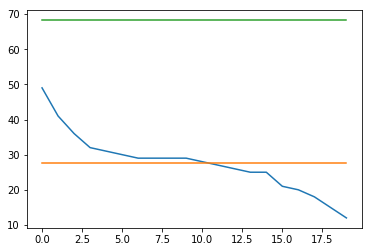

In [20]:
import numpy as np
import matplotlib.pyplot as plt
l = len(df)
x = np.arange(l)
y = df.Pts
plt.plot(x,y)
plt.plot(x,np.ones(l)*moyenne)
plt.plot(x,np.ones(l)*variance)
plt.show()